### Essential climate variables for assessment of climate variability from 1979 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **Essential climate variables for assessment of climate variability from 1979 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [1]:
import earthkit.data
import earthkit.maps
import datetime

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [2]:
t_anom = earthkit.data.from_source(
    'cds',
    'ecv-for-climate-change',
    {
        'variable': 'surface_air_temperature',
        'product_type': 'anomaly',
        'climate_reference_period': '1991_2020',
        'time_aggregation': '1_month_mean',
        'year': '2023',
        'month': '06',
        'origin': 'era5',
    },
)

#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [3]:
style = earthkit.maps.styles.Continuous(
    colors=['#08306b', '#08519c', '#f9fbfd', '#fff7ec', '#e94b0d', '#7f0000'],
    levels=[-10, -6, 0, 0, 6, 10],
    gradients=[30, 90, 0, 90, 30],
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


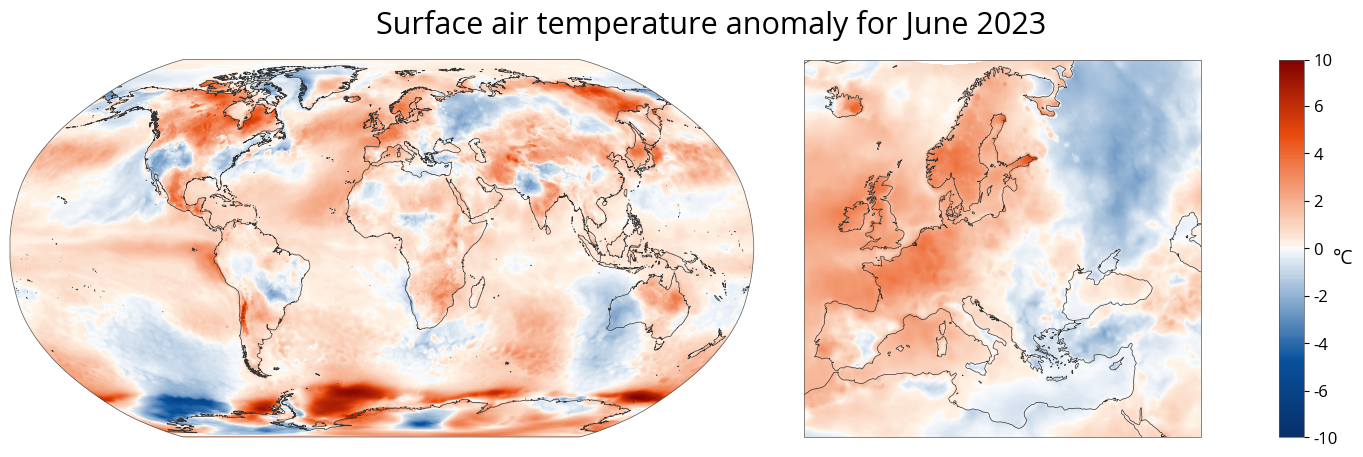

In [4]:
from matplotlib.gridspec import GridSpec

earthkit.maps.schema.figsize = (20, 5)

chart = earthkit.maps.Superplot.from_gridspec(
    GridSpec(1, 2, width_ratios=[1.9, 1], wspace=0.05),
)

robinson = chart.add_subplot(crs="Robinson")
robinson.plot(t_anom, style=style)


europe = chart.add_subplot(domain="Europe")
europe.plot(t_anom, style=style)

chart.coastlines(resolution="medium")

legend = chart.legend(
    location="right",
    label="°C",
    aspect=15,
    shrink=1.0,
    ticks=[-10, -6, -4, -2, 0, 2, 4, 6, 10],
)

legend.set_label("°C", rotation=0, fontsize=14)
legend.ax.tick_params(labelsize=12)

anno1 = "Date created: " + str(datetime.date.today())
anno2 = ("Data: ERA5.  Reference period: 1991-2020.  Credit: C3S/ECMWF")

chart.title("Surface air temperature anomaly for {time:%B %Y}", fontsize=22)

chart.show()

/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


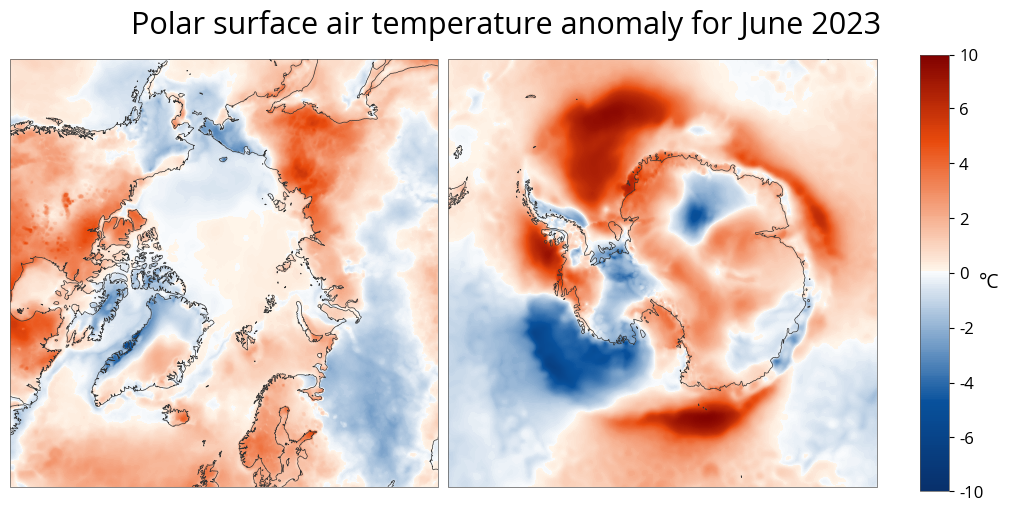

In [10]:
earthkit.maps.schema.figsize = (10, 5)
chart = earthkit.maps.Superplot(rows=1, cols=2)

left_plot = chart.add_subplot(domain="Arctic")
left_plot.plot(t_anom, style=style, transform_first=False)

right_plot = chart.add_subplot(domain="Antarctic")
right_plot.plot(t_anom, style=style, transform_first=False)

chart.coastlines(resolution="medium")

legend = chart.legend(
    location="right",
    label="°C",
    aspect=15,
    shrink=1.0,
    ticks=[-10, -6, -4, -2, 0, 2, 4, 6, 10],
)

legend.set_label("°C", rotation=0, fontsize=14)
legend.ax.tick_params(labelsize=12)

chart.title("Polar surface air temperature anomaly for {time:%B %Y}", fontsize=22)

chart.show()

In [6]:
ice_anom, ice_mean, ice_climate = earthkit.data.from_source(
    'cds',
    'ecv-for-climate-change',
    {
        'variable': 'sea_ice_cover',
        'product_type': [
            'anomaly', 'monthly_mean', 'climatology'
        ],
        'climate_reference_period': '1991_2020',
        'time_aggregation': '1_month_mean',
        'year': '2023',
        'month': '06',
        'origin': 'era5',
    },
)

In [7]:
mean_style = earthkit.maps.styles.Continuous(
    colors=[(0.031,0.318,0.612), (0.031,0.318,0.612), "white"],
    levels=[0, 15, 100],
    gradients=[15, 60],
    scale_factor=100,
)

ice_anom_style = earthkit.maps.styles.Continuous(
    colors=['#08306b', '#08519c', '#f9fbfd', 'white', '#fff7ec', '#e94b0d', '#7f0000'][::-1],
    levels=[-100, -75, -5, 0, 5, 75, 100],
    gradients=[30, 90, 10, 10, 90, 30],
    scale_factor=100,
)

/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mair/anaconda3/envs/EARTHKIT/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


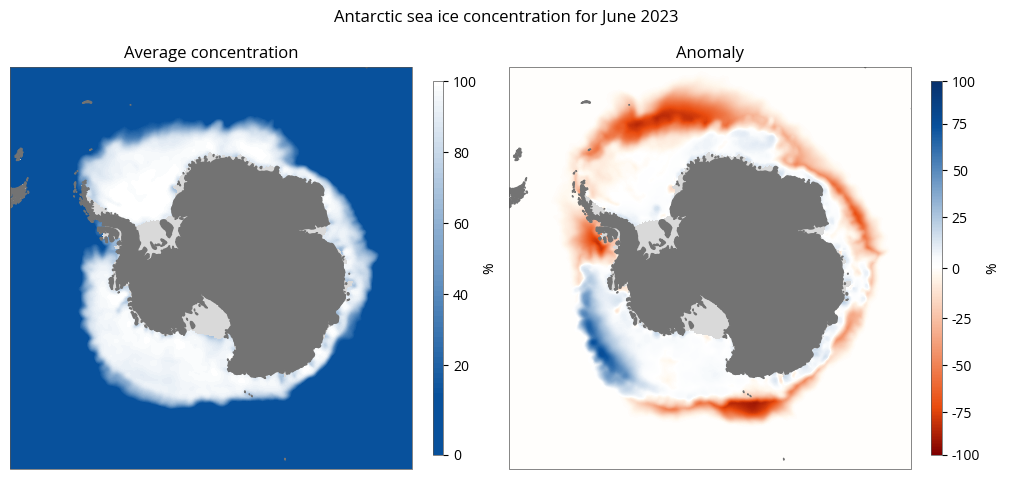

In [8]:
earthkit.maps.schema.figsize = (10, 5)
chart = earthkit.maps.Superplot(domain="Antarctic", rows=1, cols=2)

left_plot = chart.add_subplot()
left_plot.plot(ice_mean, style=mean_style, transform_first=False)
left_plot.legend(label="%", ticks=range(0, 101, 20))
left_plot.title("Average concentration")
left_plot.ax.set_facecolor("#D9D9D9")

right_plot = chart.add_subplot()
right_plot.plot(ice_anom, style=ice_anom_style, transform_first=False)
right_plot.legend(label="%", ticks=range(-100, 101, 25))
right_plot.title("Anomaly")
right_plot.ax.set_facecolor("#D9D9D9")

chart.land(color="#737373", resolution="medium")

chart.title("Antarctic sea ice concentration for {time:%B %Y}")

chart.show()